In [23]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
plt.rc('font', family='Malgun Gothic')
WordCloud(colormap='Pastel1')
# 지수표현 없이 출력하기
pd.options.display.float_format = '{:.5f}'.format

In [2]:
shop = 'shop.xlsx'

In [3]:
shop = pd.read_excel(shop)

In [4]:
shop

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-13 17:03:37,구매확정,N,NaN,NaN
1,191216100347429,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN
2,191216100347429,지니,eHBM셀파수학교실 삼색볼펜-1세트 50개입,HB,3,67500,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN
3,191216173241622,지니,eHBM셀파수학교실 회원용 리플렛-1세트 50권입,HB,2,30000,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN
4,191216173241622,지니,eHBM셀파수학교실-학습계통도(중등 5종),HB,1,750,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
218596,221108104041264,에이스디포,[스마트 HBE*초도] 입체 액자형 현판,에이스디포,1,35000,웰컴마일,2022-11-08 10:38:21,결제완료,Y,NaN,NaN
218597,221108104041264,에이스디포,[스마트 HBE*초도] 아크릴 사인,HB,1,26900,웰컴마일,2022-11-08 10:38:21,결제완료,Y,NaN,NaN
218598,221108104536307,에이스디포,[스마트 HBM] 아크릴 사인,HB,1,26900,신 + 포,2022-11-08 10:43:15,배송준비,N,NaN,NaN
218599,221108104735216,다우기술,[스타벅스] 아이스 카페 아메리카노 T,스타벅스,1,4050,포인트,2022-11-08 10:45:14,배송완료,N,NaN,NaN


# 데이터 전처리

In [5]:
# 데이터 분석에 필요없는 초도상품, 제작문구 내역 컬럼 삭제
shop.drop(['초도상품', '제작문구 내역'], axis = 1, inplace = True)

In [6]:
# 카테고리 파악
unique_paymenet = shop['결제방법'].unique()

unique_paymenet

array(['신용카드', '가상계좌', '후불', '무통장입금', nan, '신 + 포', '포인트', '신 + 적',
       '신 + 적 + 포', '적 + 포', '웰컴마일', '신 + 웰컴', '적립금', '후 + 포',
       '후 + 적 + 포', '후 + 적', '정 + 적', '정 + 적 + 포', '정기결제', '정 + 포',
       '현금간편결제', '현 + 포', '현 + 적', '현 + 적 + 포', '-', ' + 포'], dtype=object)

In [7]:
# 결제방법 중 '-' 항목은 구분을 할 수 없으므로 - 항목이 있는 행을 삭제한다.
shop = shop.drop(shop[shop['결제방법'] == '-'].index,axis=0)

In [8]:
# 결제방법 중 '+ 포' 항목은 구분을 할 수 없으므로 + 포 항목이 있는 행을 삭제한다.
shop = shop.drop(shop[shop['결제방법'] == ' + 포'].index,axis=0)

In [9]:
# 결제방법 중 결측치가 있는 행을 삭제한다.
shop = shop.dropna(subset = ['결제방법'])

In [10]:
shop

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,할부기간
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-13 17:03:37,구매확정,NaN
1,191216100347429,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-16 10:04:50,구매확정,NaN
2,191216100347429,지니,eHBM셀파수학교실 삼색볼펜-1세트 50개입,HB,3,67500,신용카드,2019-12-16 10:04:50,구매확정,NaN
3,191216173241622,지니,eHBM셀파수학교실 회원용 리플렛-1세트 50권입,HB,2,30000,신용카드,2019-12-16 17:33:43,구매확정,NaN
4,191216173241622,지니,eHBM셀파수학교실-학습계통도(중등 5종),HB,1,750,신용카드,2019-12-16 17:33:43,구매확정,NaN
...,...,...,...,...,...,...,...,...,...,...
218596,221108104041264,에이스디포,[스마트 HBE*초도] 입체 액자형 현판,에이스디포,1,35000,웰컴마일,2022-11-08 10:38:21,결제완료,NaN
218597,221108104041264,에이스디포,[스마트 HBE*초도] 아크릴 사인,HB,1,26900,웰컴마일,2022-11-08 10:38:21,결제완료,NaN
218598,221108104536307,에이스디포,[스마트 HBM] 아크릴 사인,HB,1,26900,신 + 포,2022-11-08 10:43:15,배송준비,NaN
218599,221108104735216,다우기술,[스타벅스] 아이스 카페 아메리카노 T,스타벅스,1,4050,포인트,2022-11-08 10:45:14,배송완료,NaN


# 결제수단 범주화

In [11]:
# 신용카드 범주화
shop['결제방법'] = shop['결제방법'].replace(['신용카드', '신 + 포', '신 + 웰컴', '신 + 적', '신 + 적 + 포'], '신용카드')

In [12]:
# 적립금 범주화, 물건을 구매하면 포인트가 쌓인다는 가정 하에 적립금으로 범주화 했습니다.
shop['결제방법'] = shop['결제방법'].replace(['포인트', '적 + 포', '웰컴마일', '적립금'], '적립금')

In [13]:
# 후불결제 범주화
shop['결제방법'] = shop['결제방법'].replace(['후불', '후 + 포', '후 + 적 + 포', '후 + 적'], '후불결제')

In [14]:
# 현금 범주화
shop['결제방법'] = shop['결제방법'].replace(['가상계좌', '무통장입금', '현금간편결제', '현 + 포', '현 + 적', '현 + 적 + 포'], '현금')

In [15]:
# 정기결제 범주화
shop['결제방법'] = shop['결제방법'].replace(['정기결제', '정 + 적', '정 + 적 + 포', '정 + 포'], '정기결제')

In [16]:
# 총 5개로 범주화가 잘 되어있는지 확인한다.
unique_paymenet = shop['결제방법'].unique()

unique_paymenet

array(['신용카드', '현금', '후불결제', '적립금', '정기결제'], dtype=object)

In [17]:
shop

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,할부기간
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-13 17:03:37,구매확정,NaN
1,191216100347429,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-16 10:04:50,구매확정,NaN
2,191216100347429,지니,eHBM셀파수학교실 삼색볼펜-1세트 50개입,HB,3,67500,신용카드,2019-12-16 10:04:50,구매확정,NaN
3,191216173241622,지니,eHBM셀파수학교실 회원용 리플렛-1세트 50권입,HB,2,30000,신용카드,2019-12-16 17:33:43,구매확정,NaN
4,191216173241622,지니,eHBM셀파수학교실-학습계통도(중등 5종),HB,1,750,신용카드,2019-12-16 17:33:43,구매확정,NaN
...,...,...,...,...,...,...,...,...,...,...
218596,221108104041264,에이스디포,[스마트 HBE*초도] 입체 액자형 현판,에이스디포,1,35000,적립금,2022-11-08 10:38:21,결제완료,NaN
218597,221108104041264,에이스디포,[스마트 HBE*초도] 아크릴 사인,HB,1,26900,적립금,2022-11-08 10:38:21,결제완료,NaN
218598,221108104536307,에이스디포,[스마트 HBM] 아크릴 사인,HB,1,26900,신용카드,2022-11-08 10:43:15,배송준비,NaN
218599,221108104735216,다우기술,[스타벅스] 아이스 카페 아메리카노 T,스타벅스,1,4050,적립금,2022-11-08 10:45:14,배송완료,NaN


In [18]:
sales_total = shop.groupby('결제방법')['판매금액'].agg(['sum', 'mean']).reset_index()
sales_total.columns = ['결제방법', '판매금액 합계', '판매금액 평균']

sales_total

,결제방법,판매금액 합계,판매금액 평균
0,신용카드,7229664135,43539.07940
1,적립금,776672165,18562.91025
2,정기결제,1490893200,941815.03474
3,현금,408470005,55228.50257
4,후불결제,490479000,1381630.98592


# 결제금액 시각화

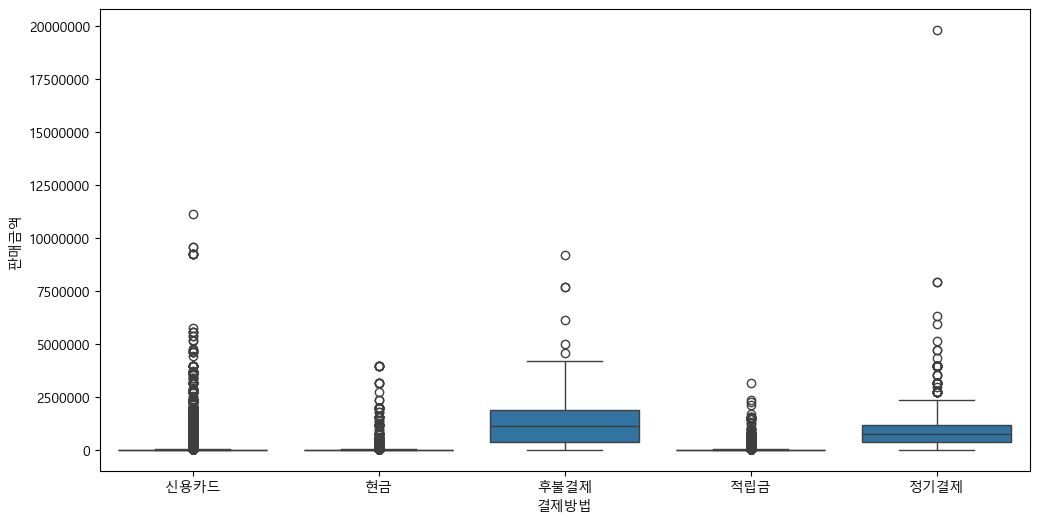

In [19]:
# Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(y='판매금액', x = '결제방법', data = shop)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

### 결제방법 - 판매금액 평균 시각화

C:\Users\user\AppData\Local\Temp\ipykernel_18972\1935044816.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar = sns.barplot(y='판매금액', x = '결제방법', data = shop, palette="pastel",ci = None)
C:\Users\user\AppData\Local\Temp\ipykernel_18972\1935044816.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(y='판매금액', x = '결제방법', data = shop, palette="pastel",ci = None)


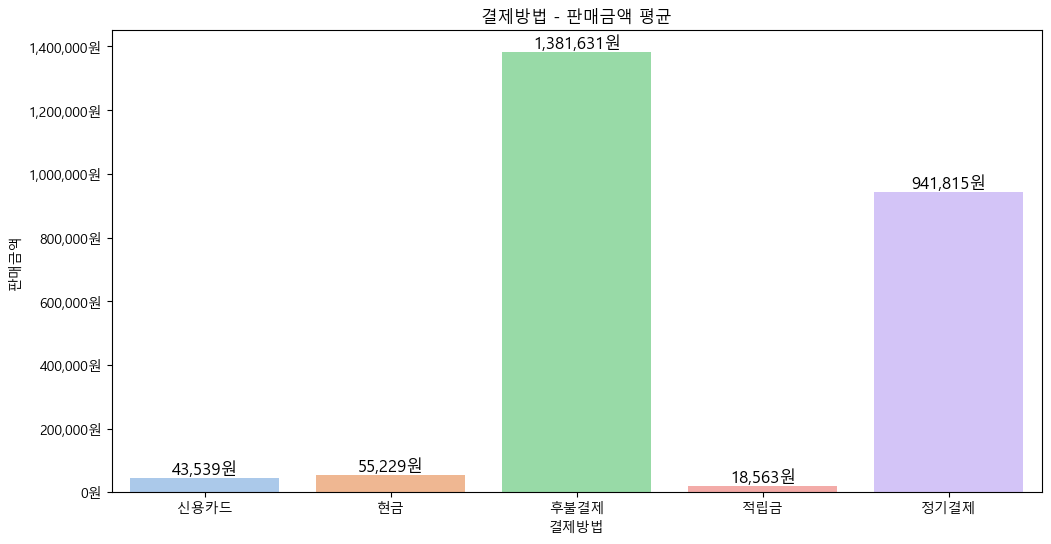

In [30]:
# y축 화폐단위 변경
def currency_formatter(x, pos):
    return '{:,.0f}원'.format(x)

# 막대그래프
plt.figure(figsize=(12, 6))
bar = sns.barplot(y='판매금액', x = '결제방법', data = shop, palette="pastel",ci = None)
plt.ticklabel_format(style='plain', axis='y')
plt.title('결제방법 - 판매금액 평균')

# y축 화폐 단위 변경
bar.yaxis.set_major_formatter(FuncFormatter(currency_formatter))

# 숫자 표기
for p in bar.patches:
    bar.text(p.get_x() + p.get_width()/2., p.get_height(), '{:,.0f}원'.format(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

plt.show()

### 결제방법 - 판매금액 합계 시각화

C:\Users\user\AppData\Local\Temp\ipykernel_18972\2551847001.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.barplot(y='판매금액 합계', x = '결제방법', data = sales_total,palette="pastel")


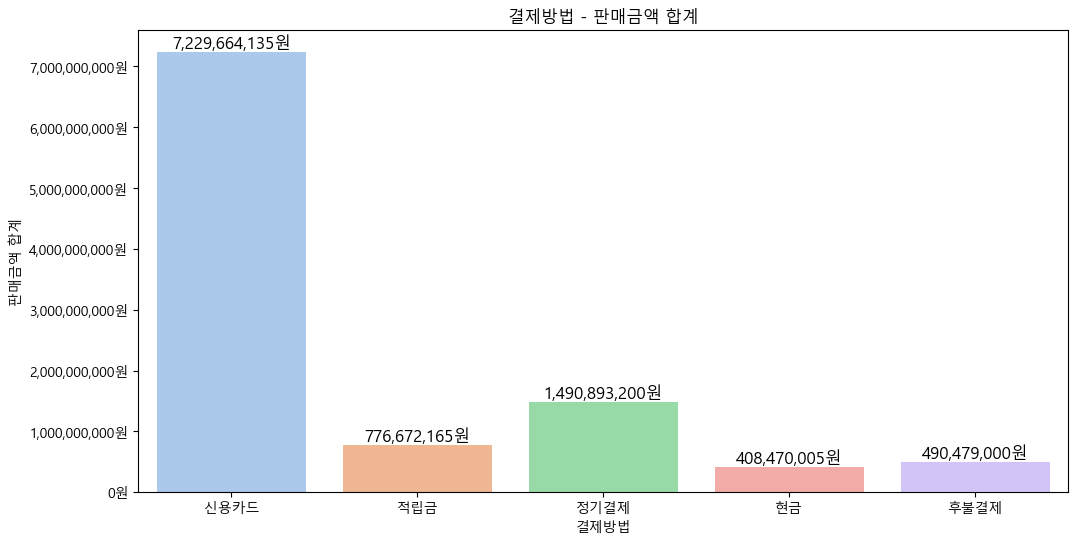

In [31]:
# 막대그래프
plt.figure(figsize=(12, 6))
graph = sns.barplot(y='판매금액 합계', x = '결제방법', data = sales_total,palette="pastel")
plt.ticklabel_format(style='plain', axis='y')
plt.title('결제방법 - 판매금액 합계')


# y축 화폐 단위 변경
graph.yaxis.set_major_formatter(FuncFormatter(currency_formatter))

# 숫자 표기
for p in graph.patches:
    graph.text(p.get_x() + p.get_width()/2., p.get_height(), '{:,.0f}원'.format(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

plt.show()

# 결제수단 - 상품명 워드클라우드

In [22]:
# '결제방법'이 '신용카드'인 행만 필터링
credit_card_rows = shop[shop['결제방법'] == '신용카드']
cash_rows = shop[shop['결제방법'] == '현금']
point_rows = shop[shop['결제방법'] == '적립금']
regular_payment_rows = shop[shop['결제방법'] == '정기결제']
later_payment_rows = shop[shop['결제방법'] == '후불결제']

In [ ]:
# 상품명에서 결측치 값을 Unknown 으로 입력한다.
credit_card_rows['상품명'].fillna('Unknown', inplace = True)
cash_rows['상품명'].fillna('Unknown', inplace = True)
point_rows['상품명'].fillna('Unknown', inplace = True)
regular_payment_rows['상품명'].fillna('Unknown', inplace = True)
later_payment_rows['상품명'].fillna('Unknown', inplace= True)

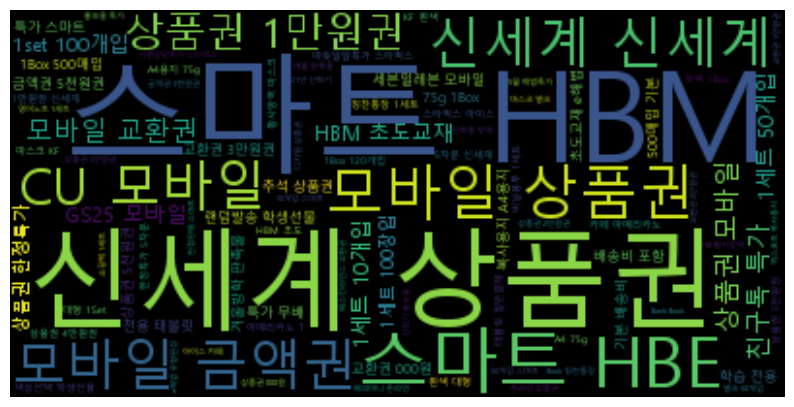

In [24]:
# 신용카드 - 상품명 텍스트 결합
text_credit = ' '.join(credit_card_rows['상품명'])

# 워드클라우드 생성
wordcloud = WordCloud(font_path = 'C:\Windows\Fonts\malgun.ttf').generate(text_credit)

# 신용카드 워드클라우드 시각화
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

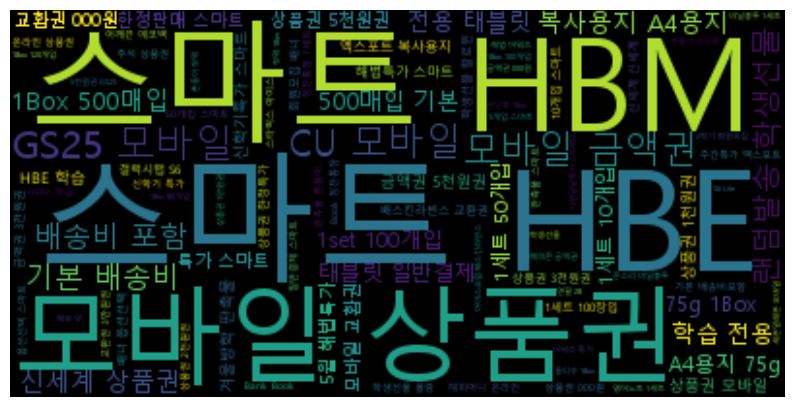

In [51]:
# 현금 - 상품명 텍스트 결합
text_cash = ' '.join(cash_rows['상품명'])

# 워드클라우드 생성
wordcloud = WordCloud(font_path = 'C:\Windows\Fonts\malgun.ttf').generate(text_cash)

# 신용카드 워드클라우드 시각화
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

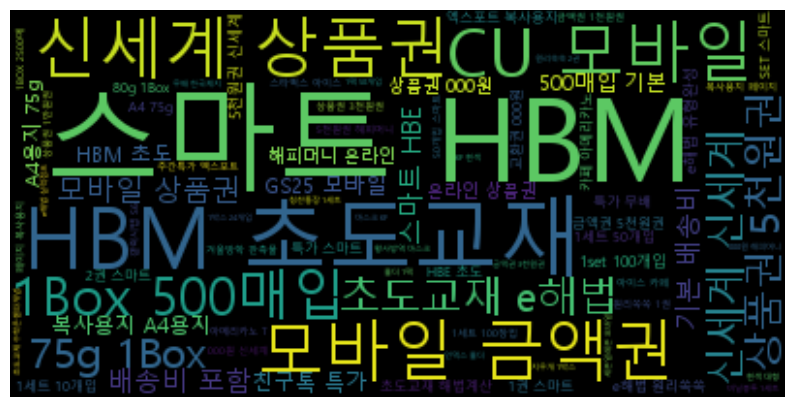

In [52]:
# 적립금 - 상품명 텍스트 결합
text_point = ' '.join(point_rows['상품명'])

# 워드클라우드 생성
wordcloud = WordCloud(font_path = 'C:\Windows\Fonts\malgun.ttf').generate(text_point)

# 적립금 워드클라우드 시각화
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

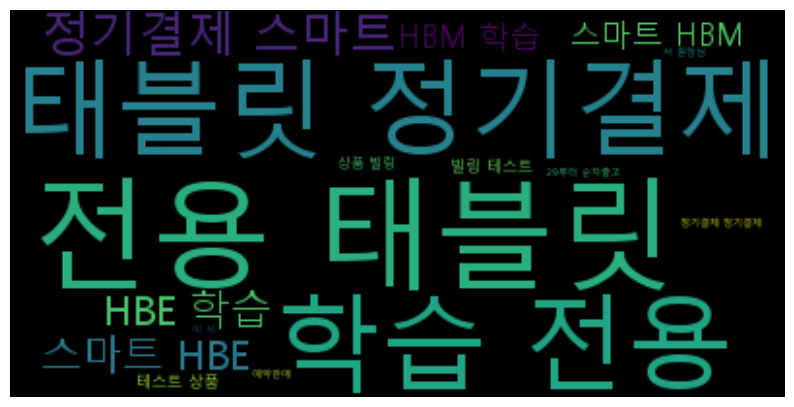

In [53]:
# 정기결제 - 상품명 텍스트 결합
text_regular = ' '.join(regular_payment_rows['상품명'])

# 워드클라우드 생성
wordcloud = WordCloud(font_path = 'C:\Windows\Fonts\malgun.ttf').generate(text_regular)

# 정기결제 워드클라우드 시각화
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

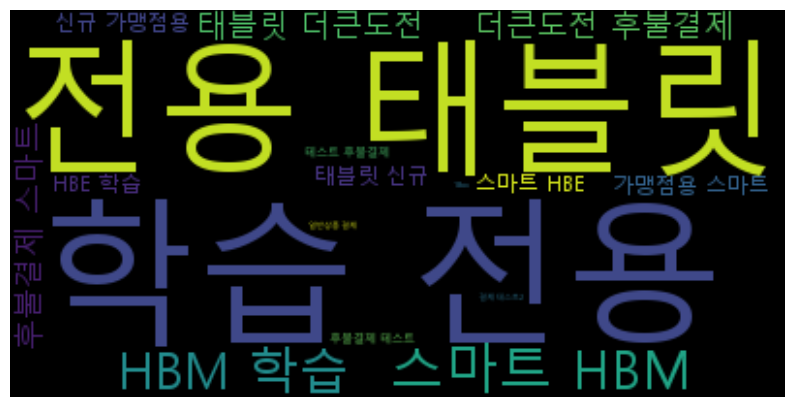

In [54]:
# 후불결제 - 상품명 텍스트 결합
text_later = ' '.join(later_payment_rows['상품명'])

# 워드클라우드 생성
wordcloud = WordCloud(font_path = 'C:\Windows\Fonts\malgun.ttf').generate(text_later)

# 후불결제 워드클라우드 시각화
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### 전체적으로 상품명에서 상품이 아니거나 설명, 단위인 내용은 품목을 보기에 불필요하므로 제거한다.

In [107]:
shop['상품명'] = shop['상품명'].str.replace('스마트 HBM', '')
shop['상품명'] = shop['상품명'].str.replace('스마트 HBE', '')
shop['상품명'] = shop['상품명'].str.replace('학생선물', '')
shop['상품명'] = shop['상품명'].str.replace('스마트', '')
shop['상품명'] = shop['상품명'].str.replace('특가', '')
shop['상품명'] = shop['상품명'].str.replace('1세트', '')
shop['상품명'] = shop['상품명'].str.replace('50개입', '')
shop['상품명'] = shop['상품명'].str.replace('1Box', '')
shop['상품명'] = shop['상품명'].str.replace('1set', '')
shop['상품명'] = shop['상품명'].str.replace('1만원권', '')
shop['상품명'] = shop['상품명'].str.replace('eHBM셀파수학교실', '')
shop['상품명'] = shop['상품명'].str.replace('랜덤발송', '')
shop['상품명'] = shop['상품명'].str.replace('색상선택', '')
shop['상품명'] = shop['상품명'].str.replace('옵션선택', '')
shop['상품명'] = shop['상품명'].str.replace('친구톡', '')
shop['상품명'] = shop['상품명'].str.replace('모바일', '')
shop['상품명'] = shop['상품명'].str.replace('교환권', '')
shop['상품명'] = shop['상품명'].str.replace('금액권', '')
shop['상품명'] = shop['상품명'].str.replace('신학기', '')
shop['상품명'] = shop['상품명'].str.replace('포함', '')
shop['상품명'] = shop['상품명'].str.replace('회원모집', '')
shop['상품명'] = shop['상품명'].str.replace('한정', '')
shop['상품명'] = shop['상품명'].str.replace('세트', '')
shop['상품명'] = shop['상품명'].str.replace('학습', '')
shop['상품명'] = shop['상품명'].str.replace('전용', '')
shop['상품명'] = shop['상품명'].str.replace('후불결제', '')
shop['상품명'] = shop['상품명'].str.replace('정기결제', '')

# 제거한 후 재분류를 한다.
credit_card_rows = shop[shop['결제방법'] == '신용카드']
cash_rows = shop[shop['결제방법'] == '현금']
point_rows = shop[shop['결제방법'] == '적립금']
regular_payment_rows = shop[shop['결제방법'] == '정기결제']
later_payment_rows = shop[shop['결제방법'] == '후불결제']

# 재분류 된 데이터에 결측치를 Unknown으로 채워준다.
credit_card_rows['상품명'].fillna('Unknown', inplace = True)
cash_rows['상품명'].fillna('Unknown', inplace = True)
point_rows['상품명'].fillna('Unknown', inplace = True)
regular_payment_rows['상품명'].fillna('Unknown', inplace = True)
later_payment_rows['상품명'].fillna('Unknown', inplace= True)

C:\Users\user\AppData\Local\Temp\ipykernel_12920\1714378406.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit_card_rows['상품명'].fillna('Unknown', inplace = True)
C:\Users\user\AppData\Local\Temp\ipykernel_12920\1714378406.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cash_rows['상품명'].fillna('Unknown', inplace = True)
C:\Users\user\AppData\Local\Temp\ipykernel_12920\1714378406.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

### 신용카드 - 상품명 워드클라우드 (불필요 제거 데이터)

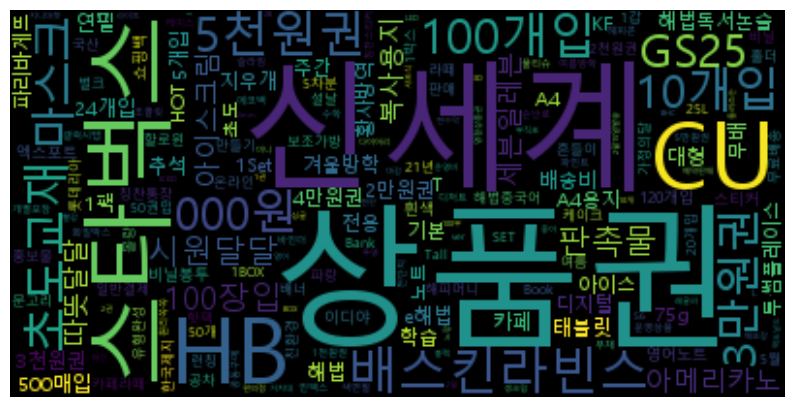

In [102]:
# 신용카드 - 상품명 텍스트 결합
text_credit = ' '.join(credit_card_rows['상품명'])

# 워드클라우드 생성
wordcloud = WordCloud(font_path = 'C:\Windows\Fonts\malgun.ttf',collocations=False).generate(text_credit)

# 신용카드 워드클라우드 시각화
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### 현금 - 상품명 워드클라우드 (불필요 제거 데이터)

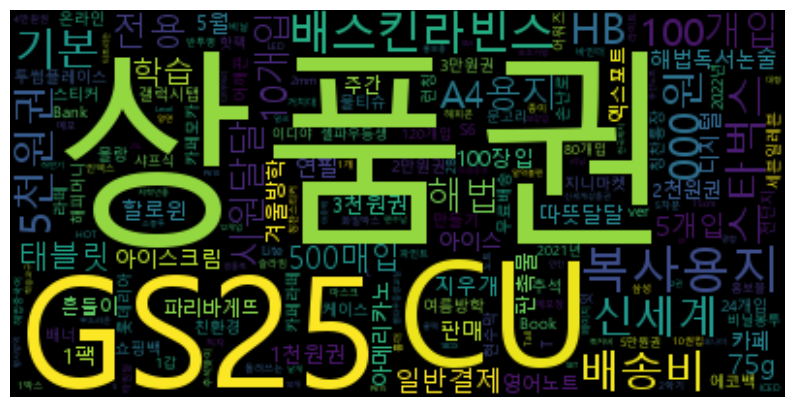

In [103]:
# 현금 - 상품명 텍스트 결합
text_cash = ' '.join(cash_rows['상품명'])

# 워드클라우드 생성
wordcloud = WordCloud(font_path = 'C:\Windows\Fonts\malgun.ttf',collocations=False).generate(text_cash)

# 현금 워드클라우드 시각화
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### 적립금 - 상품명 워드클라우드 (불필요 제거 데이터)

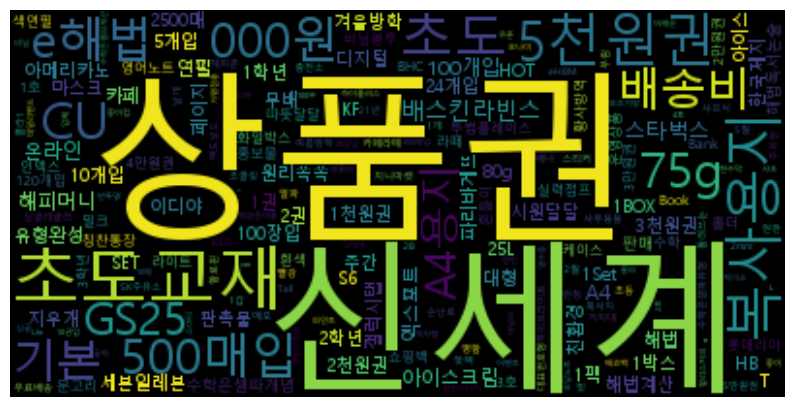

In [104]:
# 적립금 - 상품명 텍스트 결합
text_point = ' '.join(point_rows['상품명'])

# 워드클라우드 생성
wordcloud = WordCloud(font_path = 'C:\Windows\Fonts\malgun.ttf',collocations=False).generate(text_point)

# 적립금 워드클라우드 시각화
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### 정기결제 - 상품명 워드클라우드

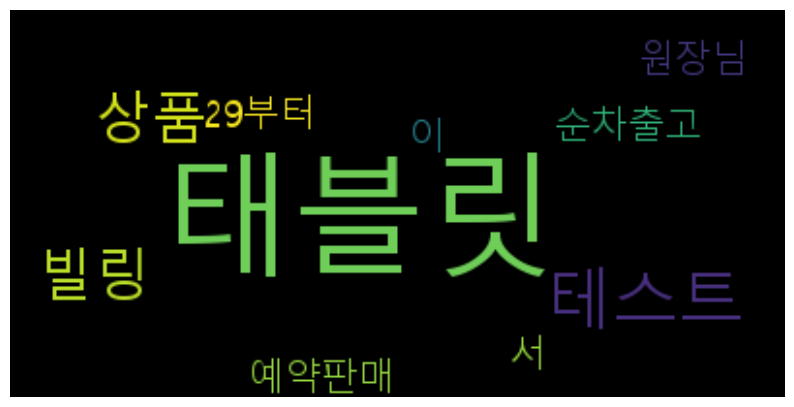

In [110]:
# 정기결제 - 상품명 텍스트 결합
text_regular = ' '.join(regular_payment_rows['상품명'])

# 워드클라우드 생성
wordcloud = WordCloud(font_path = 'C:\Windows\Fonts\malgun.ttf',collocations=False).generate(text_regular)

# 정기결제 워드클라우드 시각화
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### 후불결제 - 상품명 워드클라우드

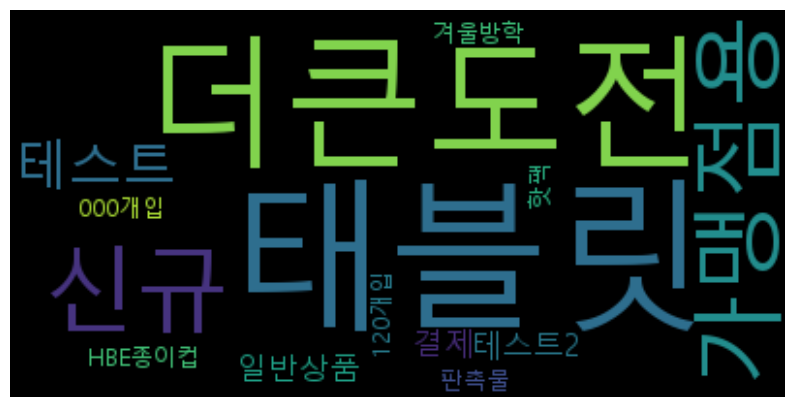

In [109]:
# 후불결제 - 상품명 텍스트 결합
text_later = ' '.join(later_payment_rows['상품명'])

# 워드클라우드 생성
wordcloud = WordCloud(font_path = 'C:\Windows\Fonts\malgun.ttf',collocations=False).generate(text_later)

# 후불결제 워드클라우드 시각화
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# 결제수단 - 제조사 워드클라우드

In [ ]:
# 제조사에서 결측치 값을 Unknown 으로 입력한다. 
credit_card_rows['제조사'].fillna('Unknown', inplace = True)
cash_rows['제조사'].fillna('Unknown', inplace = True)
point_rows['제조사'].fillna('Unknown', inplace = True)
regular_payment_rows['제조사'].fillna('Unknown', inplace = True)
later_payment_rows['제조사'].fillna('Unknown', inplace= True)

### 신용카드 - 제조사 워드클라우드

C:\Users\user\AppData\Local\Temp\ipykernel_12920\2105973560.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit_card_rows['제조사'] = credit_card_rows['제조사'].str.replace('Unknown', '')


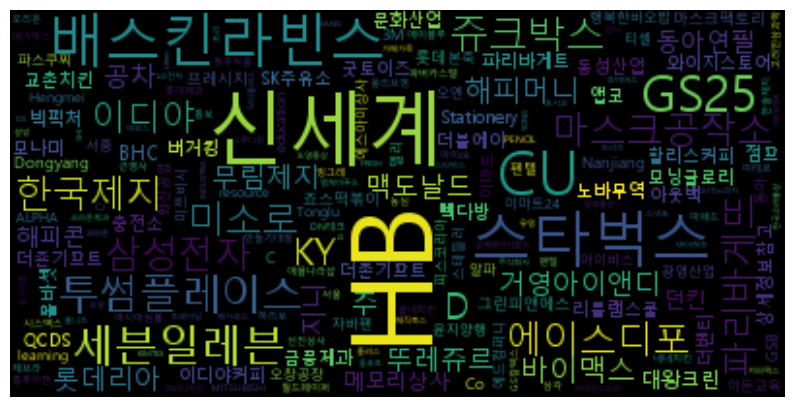

In [63]:
#결측치 텍스트 없음 처리
credit_card_rows['제조사'] = credit_card_rows['제조사'].str.replace('Unknown', '')

# 신용카드 - 제조사 텍스트 결합
text_credit_product = ' '.join(credit_card_rows['제조사'])

# 워드클라우드 생성
wordcloud = WordCloud(font_path = 'C:\Windows\Fonts\malgun.ttf',collocations=False).generate(text_credit_product)

# 신용카드 워드클라우드 시각화
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### 현금 - 제조사 워드클라우드

C:\Users\user\AppData\Local\Temp\ipykernel_12920\2983655948.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cash_rows['제조사'] = cash_rows['제조사'].str.replace('Unknown', '')


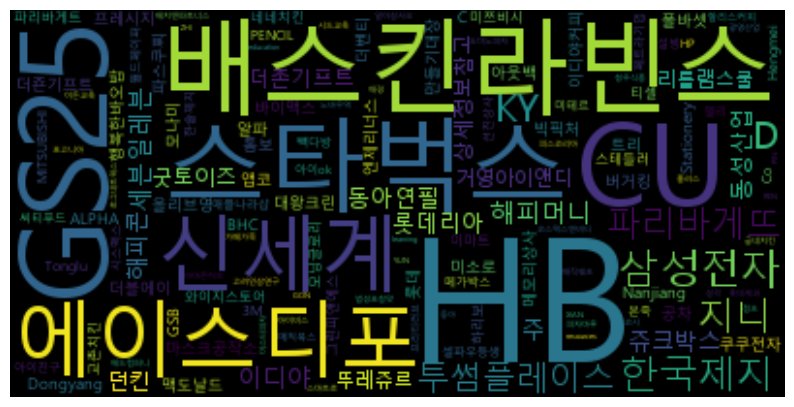

In [69]:
#결측치 텍스트 없음 처리
cash_rows['제조사'] = cash_rows['제조사'].str.replace('Unknown', '')

# 현금 - 제조사 텍스트 결합
text_cash_product = ' '.join(cash_rows['제조사'])

# 워드클라우드 생성
wordcloud = WordCloud(font_path = 'C:\Windows\Fonts\malgun.ttf',collocations=False).generate(text_cash_product)

# 현금 워드클라우드 시각화
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### 적립금 - 제조사 워드클라우드

C:\Users\user\AppData\Local\Temp\ipykernel_12920\3628099167.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  point_rows['제조사'] = point_rows['제조사'].str.replace('Unknown', '')


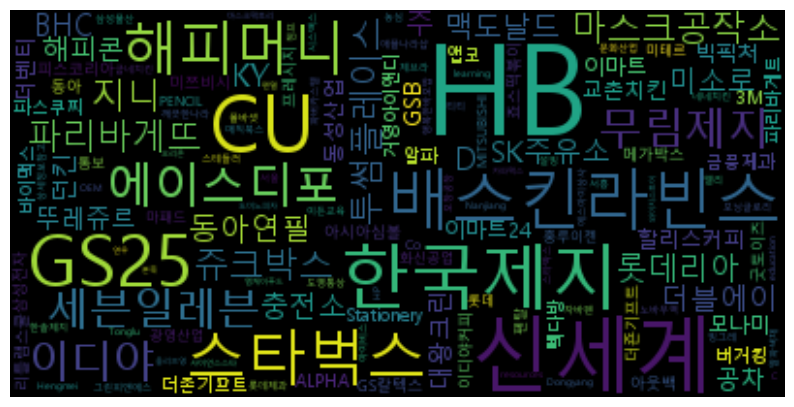

In [70]:
#결측치 텍스트 없음 처리
point_rows['제조사'] = point_rows['제조사'].str.replace('Unknown', '')

# 현금 - 제조사 텍스트 결합
text_point_product = ' '.join(point_rows['제조사'])

# 워드클라우드 생성
wordcloud = WordCloud(font_path = 'C:\Windows\Fonts\malgun.ttf',collocations=False).generate(text_point_product)

# 현금 워드클라우드 시각화
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### 정기결제 - 제조사 워드클라우드

C:\Users\user\AppData\Local\Temp\ipykernel_12920\3710403557.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regular_payment_rows['제조사'] = regular_payment_rows['제조사'].str.replace('Unknown', '')


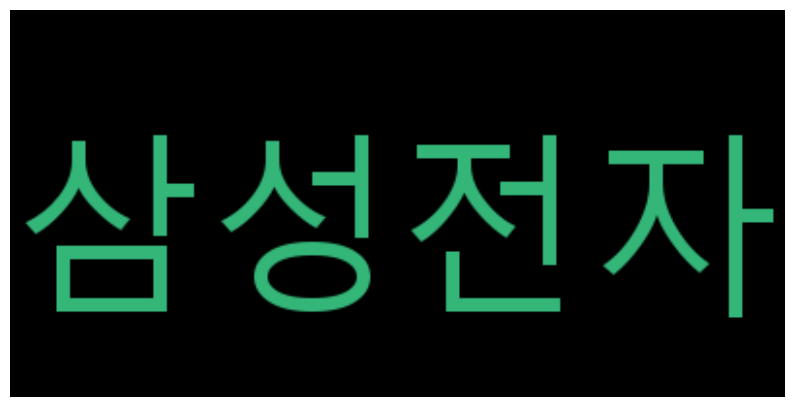

In [71]:
#결측치 텍스트 없음 처리
regular_payment_rows['제조사'] = regular_payment_rows['제조사'].str.replace('Unknown', '')

# 현금 - 제조사 텍스트 결합
text_regular_product = ' '.join(regular_payment_rows['제조사'])

# 워드클라우드 생성
wordcloud = WordCloud(font_path = 'C:\Windows\Fonts\malgun.ttf',collocations=False).generate(text_regular_product)

# 현금 워드클라우드 시각화
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### 후불결제 - 제조사 워드클라우드

C:\Users\user\AppData\Local\Temp\ipykernel_12920\2085766970.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  later_payment_rows['제조사'] = later_payment_rows['제조사'].str.replace('Unknown', '')


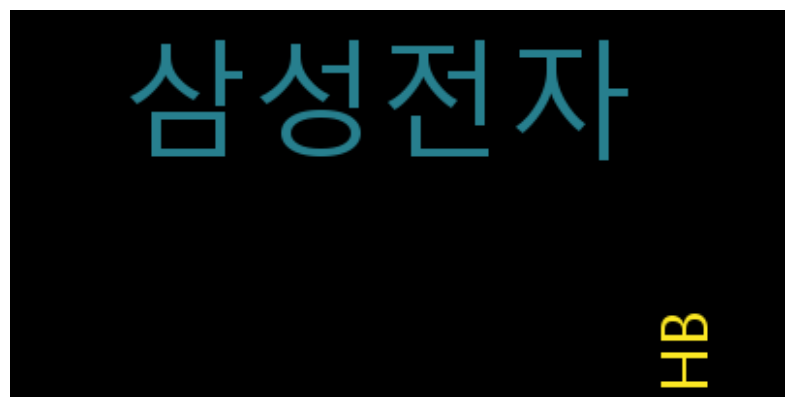

In [72]:
#결측치 텍스트 없음 처리
later_payment_rows['제조사'] = later_payment_rows['제조사'].str.replace('Unknown', '')

# 현금 - 제조사 텍스트 결합
text_later_product = ' '.join(later_payment_rows['제조사'])

# 워드클라우드 생성
wordcloud = WordCloud(font_path = 'C:\Windows\Fonts\malgun.ttf',collocations=False).generate(text_later_product)

# 현금 워드클라우드 시각화
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# 결제수단 별 금액 분포도

In [22]:
card = shop[shop['결제방법'] == '신용카드'][['결제방법', '판매금액']]
cash = shop[shop['결제방법'] == '현금'][['결제방법', '판매금액']]
point = shop[shop['결제방법'] == '적립금'][['결제방법', '판매금액']]
regular = shop[shop['결제방법'] == '정기결제'][['결제방법', '판매금액']]
later = shop[shop['결제방법'] == '후불결제'][['결제방법', '판매금액']]

In [42]:
card['판매금액'].describe()

count     166050.00000
mean       43539.07940
std       175873.28500
min            0.00000
25%         3750.00000
50%        10000.00000
75%        27900.00000
max     11130000.00000
Name: 판매금액, dtype: float64

In [50]:
cash['판매금액'].describe()

count      7396.00000
mean      55228.50257
std      229847.87849
min         100.00000
25%        4000.00000
50%        9600.00000
75%       26137.50000
max     3960000.00000
Name: 판매금액, dtype: float64

In [17]:
# 구간 및 레이블 설정
bins = [0, 60, 5000, 30000, 50000, 300000, 1000000, 5000000, shop['판매금액'].max() + 1]
labels = ['0원', '60원-5000원', '5천원-3만원', '3만원-5만원', '5만원-30만원', '30만원-100만원', '100만원-500만원', '500만원 초과']

# 전체 도수분포표
all_table = pd.cut(shop['판매금액'], bins=bins, labels=labels, right=False).value_counts().sort_index()
print(all_table)

판매금액
0원                32
60원-5000원      74192
5천원-3만원        94867
3만원-5만원        22198
5만원-30만원       18218
30만원-100만원      6264
100만원-500만원     1426
500만원 초과          27
Name: count, dtype: int64


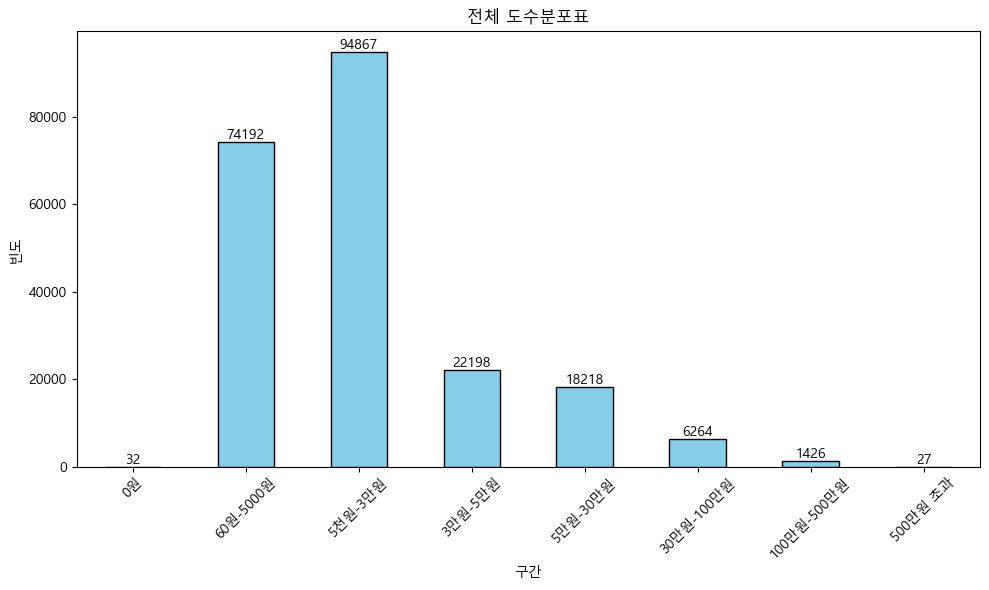

In [18]:
#시각화
plt.figure(figsize=(10, 6))
all_table.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('전체 도수분포표')
plt.xlabel('구간')
plt.ylabel('빈도')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.tight_layout()

#수치 표시
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), ha='center', va='bottom')

plt.show()

In [23]:
# 신용카드 도수분포표
card_table = pd.cut(card['판매금액'], bins=bins, labels=labels, right=False).value_counts().sort_index()
print(card_table)

판매금액
0원                29
60원-5000원      54798
5천원-3만원        73251
3만원-5만원        16977
5만원-30만원       15709
30만원-100만원      4604
100만원-500만원      665
500만원 초과          17
Name: count, dtype: int64


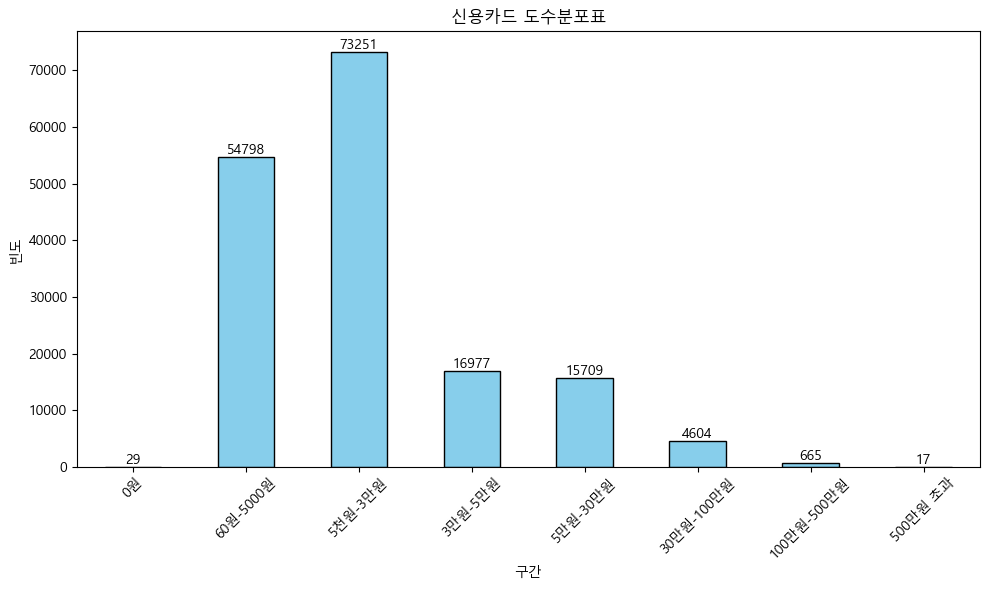

In [24]:
#시각화
plt.figure(figsize=(10, 6))
card_table.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('신용카드 도수분포표')
plt.xlabel('구간')
plt.ylabel('빈도')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.tight_layout()

#수치 표시
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), ha='center', va='bottom')

plt.show()

In [25]:
# 현금 도수분포표
cash_table = pd.cut(cash['판매금액'], bins=bins, labels=labels, right=False).value_counts().sort_index()
print(cash_table)

판매금액
0원                0
60원-5000원      2463
5천원-3만원        3345
3만원-5만원         680
5만원-30만원        601
30만원-100만원      233
100만원-500만원      74
500만원 초과          0
Name: count, dtype: int64


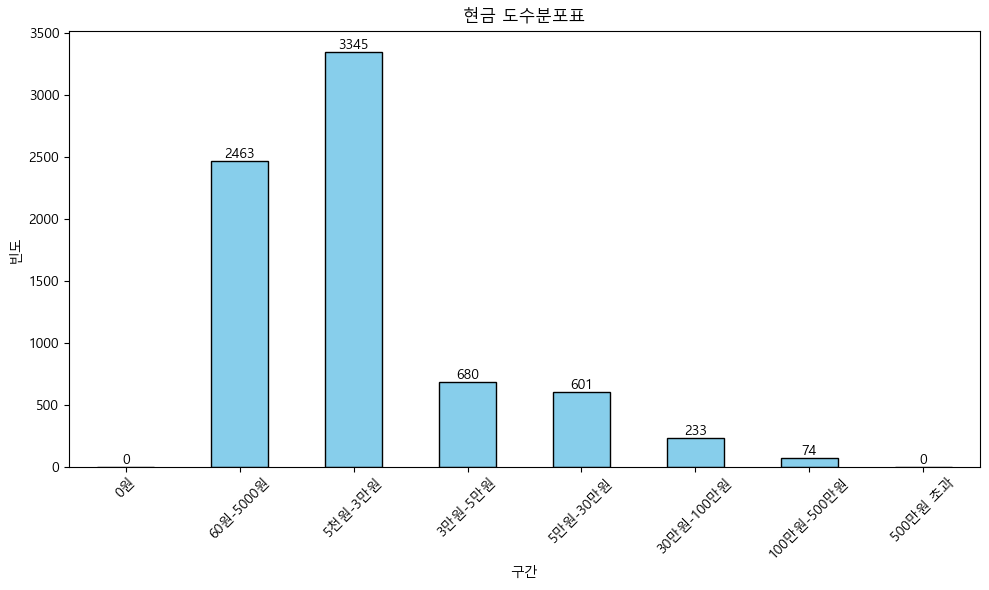

In [32]:
#시각화
plt.figure(figsize=(10, 6))
cash_table.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('현금 도수분포표')
plt.xlabel('구간')
plt.ylabel('빈도')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.tight_layout()

#수치 표시
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), ha='center', va='bottom')
    
plt.show()

In [26]:
# 적립금 도수분포표
point_table = pd.cut(point['판매금액'], bins=bins, labels=labels, right=False).value_counts().sort_index()
print(point_table)

판매금액
0원                 3
60원-5000원      16929
5천원-3만원        18269
3만원-5만원         4540
5만원-30만원        1907
30만원-100만원       160
100만원-500만원       32
500만원 초과           0
Name: count, dtype: int64


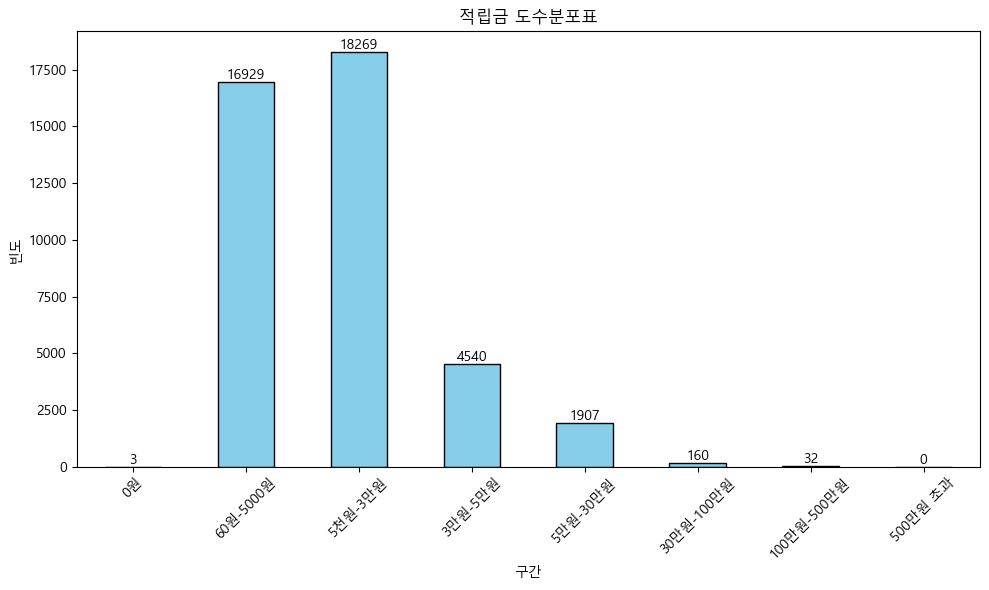

In [27]:
#시각화
plt.figure(figsize=(10, 6))
point_table.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('적립금 도수분포표')
plt.xlabel('구간')
plt.ylabel('빈도')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.tight_layout()

#수치 표시
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), ha='center', va='bottom')

plt.show()

In [28]:
# 정기결제 도수분포표
regular_table = pd.cut(regular['판매금액'], bins=bins, labels=labels, right=False).value_counts().sort_index()
print(regular_table)

판매금액
0원                0
60원-5000원         2
5천원-3만원           2
3만원-5만원           0
5만원-30만원          0
30만원-100만원     1097
100만원-500만원     476
500만원 초과          6
Name: count, dtype: int64


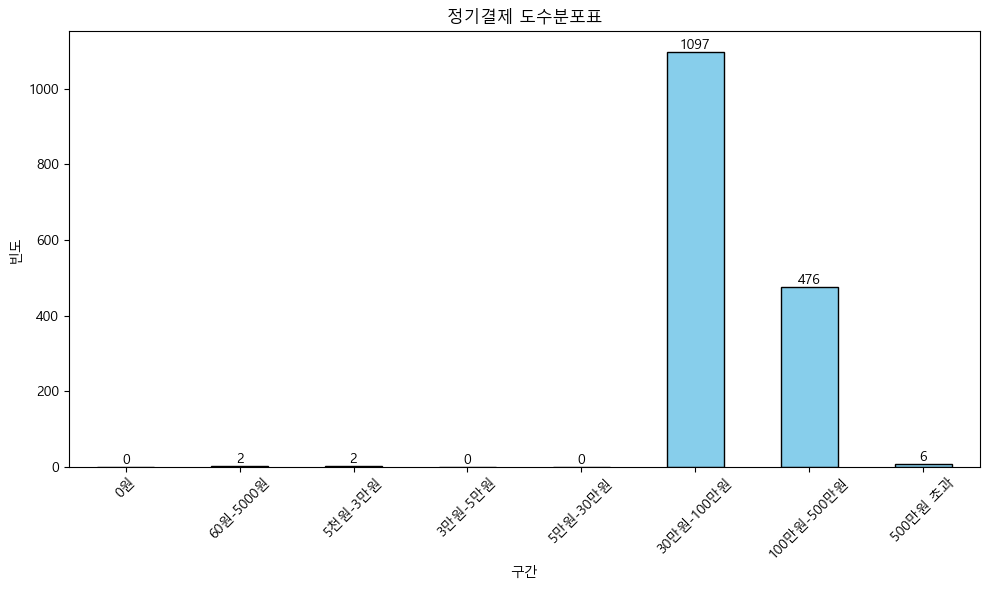

In [29]:
#시각화
plt.figure(figsize=(10, 6))
regular_table.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('정기결제 도수분포표')
plt.xlabel('구간')
plt.ylabel('빈도')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.tight_layout()

#수치 표시
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), ha='center', va='bottom')
    
plt.show()

In [30]:
# 후불결제 도수분포표
later_table = pd.cut(later['판매금액'], bins=bins, labels=labels, right=False).value_counts().sort_index()
print(later_table)

판매금액
0원               0
60원-5000원        0
5천원-3만원          0
3만원-5만원          1
5만원-30만원         1
30만원-100만원     170
100만원-500만원    179
500만원 초과         4
Name: count, dtype: int64


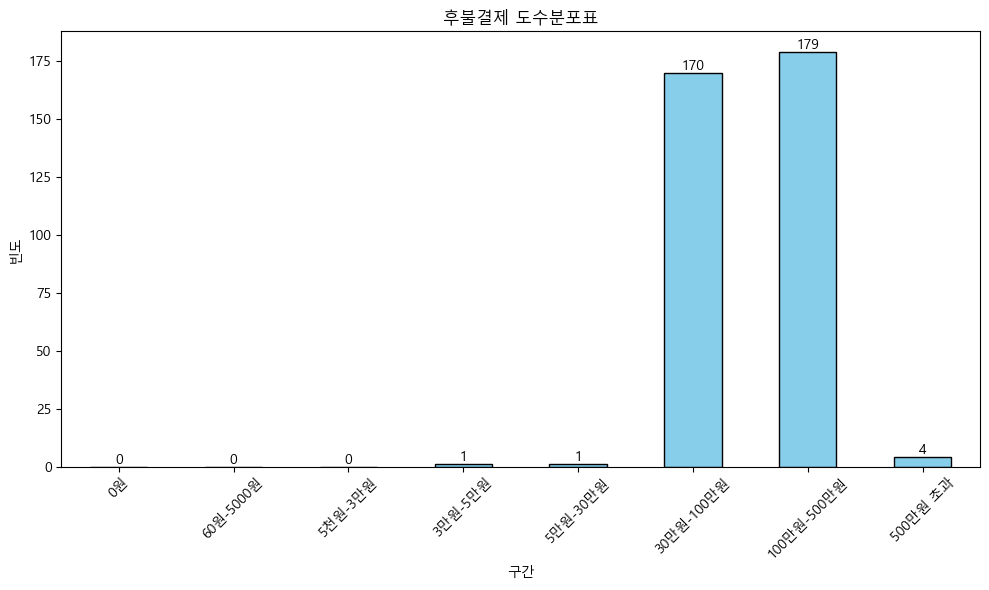

In [31]:
#시각화
plt.figure(figsize=(10, 6))
later_table.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('후불결제 도수분포표')
plt.xlabel('구간')
plt.ylabel('빈도')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.tight_layout()

#수치 표시
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), ha='center', va='bottom')

plt.show()